In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = r"C:\mes base de données\classification\synthetic_fraud_dataset.csv"
df = pd.read_csv(path)
df.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,...,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,...,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,...,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,...,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,...,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_ID                50000 non-null  object 
 1   User_ID                       50000 non-null  object 
 2   Transaction_Amount            50000 non-null  float64
 3   Transaction_Type              50000 non-null  object 
 4   Timestamp                     50000 non-null  object 
 5   Account_Balance               50000 non-null  float64
 6   Device_Type                   50000 non-null  object 
 7   Location                      50000 non-null  object 
 8   Merchant_Category             50000 non-null  object 
 9   IP_Address_Flag               50000 non-null  int64  
 10  Previous_Fraudulent_Activity  50000 non-null  int64  
 11  Daily_Transaction_Count       50000 non-null  int64  
 12  Avg_Transaction_Amount_7d     50000 non-null  float64
 13  F

In [4]:
df.shape

(50000, 21)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction_Amount,50000.0,99.411012,98.687292,0.0000,28.6775,69.66000,138.852500,1174.14
Account_Balance,50000.0,50294.065981,28760.458557,500.4800,25355.9950,50384.43000,75115.135000,99998.31
IP_Address_Flag,50000.0,0.050200,0.218360,0.0000,0.0000,0.00000,0.000000,1.00
Previous_Fraudulent_Activity,50000.0,0.098400,0.297858,0.0000,0.0000,0.00000,0.000000,1.00
Daily_Transaction_Count,50000.0,7.485240,4.039637,1.0000,4.0000,7.00000,11.000000,14.00
Avg_Transaction_Amount_7d,50000.0,255.271924,141.382279,10.0000,132.0875,256.08500,378.032500,500.00
Failed_Transaction_Count_7d,50000.0,2.003540,1.414273,0.0000,1.0000,2.00000,3.000000,4.00
Card_Age,50000.0,119.999940,68.985817,1.0000,60.0000,120.00000,180.000000,239.00
Transaction_Distance,50000.0,2499.164155,1442.013834,0.2500,1256.4975,2490.78500,3746.395000,4999.93
Risk_Score,50000.0,0.501556,0.287774,0.0001,0.2540,0.50225,0.749525,1.00


In [6]:
df_copy = df.drop(['Transaction_ID', 'User_ID','Timestamp'], axis=1)

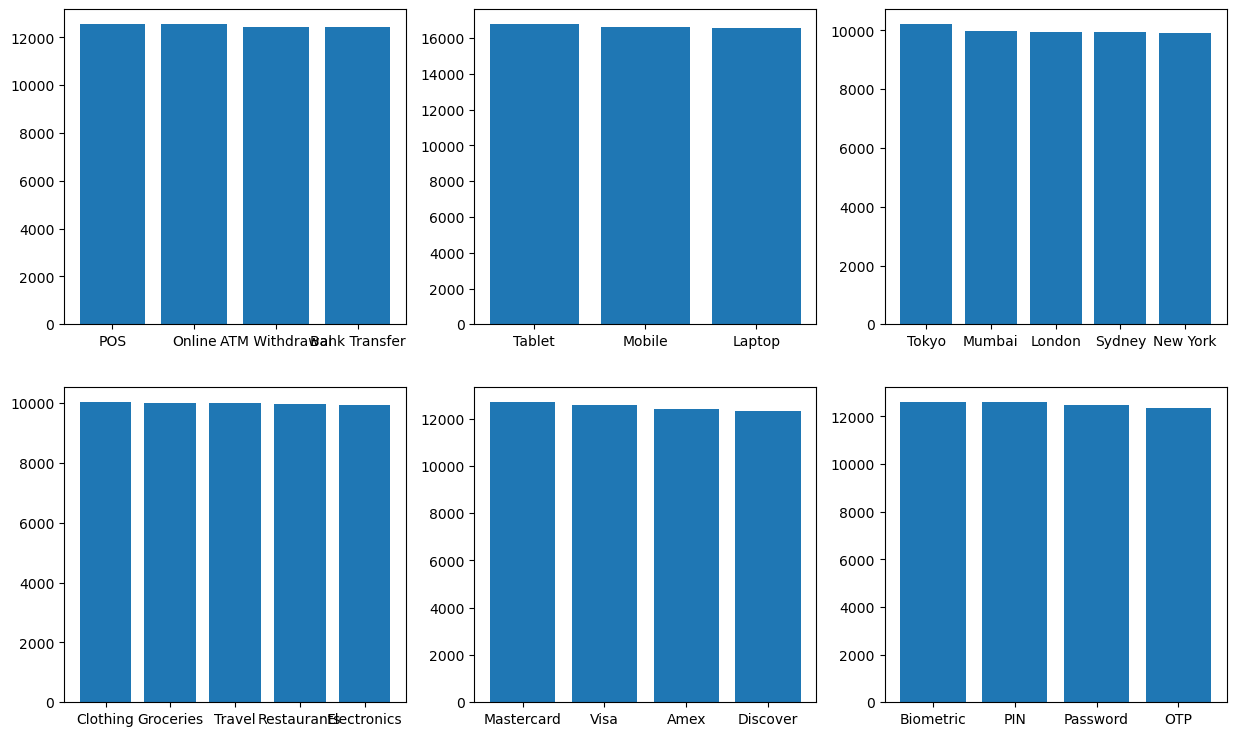

In [7]:
plt.figure(figsize=(15,9))
for i, col in enumerate(df_copy.select_dtypes('object')) : 
    x = df_copy[col].value_counts()
    plt.subplot(2,3,i+1)
    plt.bar(x = x.index, height = x.values)

<BarContainer object of 2 artists>

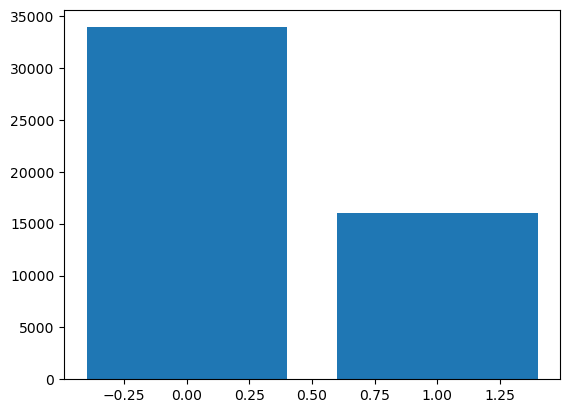

In [8]:
plt.bar(x = df_copy["Fraud_Label"].value_counts().index, height = df_copy["Fraud_Label"].value_counts().values)

In [9]:
df_copy =df_copy.drop(["Card_Age"], axis = 1)
df_object =df_copy.select_dtypes("object")
df_object

,Transaction_Type,Device_Type,Location,Merchant_Category,Card_Type,Authentication_Method
0,POS,Laptop,Sydney,Travel,Amex,Biometric
1,Bank Transfer,Mobile,New York,Clothing,Mastercard,Password
2,Online,Tablet,Mumbai,Restaurants,Visa,Biometric
3,ATM Withdrawal,Tablet,New York,Clothing,Visa,OTP
4,POS,Mobile,Mumbai,Electronics,Mastercard,Password
...,...,...,...,...,...,...
49995,Online,Mobile,Tokyo,Clothing,Amex,PIN
49996,POS,Mobile,Tokyo,Clothing,Visa,Biometric
49997,Online,Laptop,Mumbai,Clothing,Visa,Biometric
49998,Bank Transfer,Mobile,Tokyo,Electronics,Discover,Biometric


In [10]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [11]:
encoder = OneHotEncoder(handle_unknown='ignore')
object_encoded = encoder.fit_transform(df_object)
df_object_encoded = pd.DataFrame(object_encoded.toarray(), columns = encoder.get_feature_names_out())

In [12]:
data = pd.concat([df_copy.select_dtypes("int64"), df_object_encoded], axis = 1)
std = MinMaxScaler()
data_std= pd.DataFrame(std.fit_transform(data), columns = data.columns)
data_copy = data_std.copy()

In [13]:
from sklearn.utils import resample
data_majority =  data_copy[data_copy['Fraud_Label'] == 0]
data_minority = data_copy[data_copy['Fraud_Label'] == 1]
data_minority_upsampled = resample(data_minority, 
                                   replace=True, # Permet de dupliquer les données
                                   n_samples=len(data_majority), # On met au même niveau la classe majoritaire
                                   random_state=42)
data_balanced = pd.concat([data_majority, data_minority_upsampled])
data_balanced

,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Failed_Transaction_Count_7d,Is_Weekend,Fraud_Label,Transaction_Type_ATM Withdrawal,Transaction_Type_Bank Transfer,Transaction_Type_Online,Transaction_Type_POS,...,Merchant_Category_Restaurants,Merchant_Category_Travel,Card_Type_Amex,Card_Type_Discover,Card_Type_Mastercard,Card_Type_Visa,Authentication_Method_Biometric,Authentication_Method_OTP,Authentication_Method_PIN,Authentication_Method_Password
0,0.0,0.0,0.461538,0.75,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.153846,0.50,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.0,0.0,0.076923,0.50,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8,0.0,0.0,0.461538,0.75,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
9,0.0,0.0,0.384615,0.25,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5888,0.0,1.0,0.846154,1.00,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1185,0.0,0.0,0.076923,0.00,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
26383,0.0,0.0,0.307692,0.50,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
41803,0.0,0.0,0.538462,0.75,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


<BarContainer object of 2 artists>

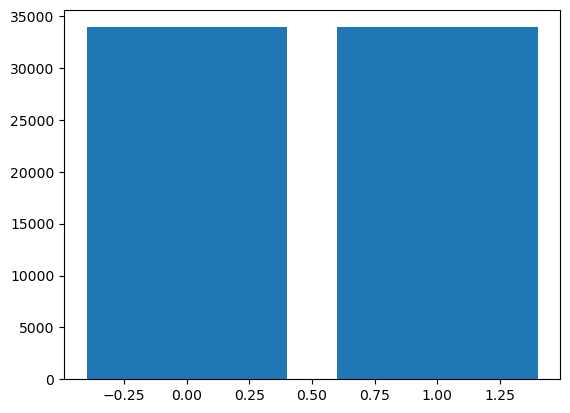

In [14]:
res = data_balanced["Fraud_Label"].value_counts()
plt.bar(x = res.index, height = res.values)

In [15]:
X = data_balanced.drop('Fraud_Label', axis =1)
y = data_balanced['Fraud_Label']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [17]:
print(f"X_train shape is : {X_train.shape}")
print(f"X_test shape is : {X_test.shape}")
print(f"y_train shape is : {y_train.shape}")
print(f"y_test shape is : {y_test.shape}")

X_train shape is : (47506, 30)
X_test shape is : (20360, 30)
y_train shape is : (47506,)
y_test shape is : (20360,)


# selection de modele

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report

In [20]:
model_dict = {
    'Decision Tree': DecisionTreeClassifier(),
    'Extra Trees': ExtraTreesClassifier(n_estimators=200),
    'Random Forest': RandomForestClassifier(),
    'HistGradientBoosting': HistGradientBoostingClassifier(max_iter=150, learning_rate=0.1),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

In [21]:
models = []
avg_precision = []
avg_recall = []
avg_f1_score = []
for name, model in model_dict.items() : 
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    result = classification_report(y_test, pred,output_dict=True)
    models.append(name)
    avg_precision.append(result['macro avg']["precision"])
    avg_recall.append(result['macro avg']["recall"])
    avg_f1_score.append(result['macro avg']["f1-score"])
    
evaluation_df = pd.DataFrame({"models":models,
                              "avg_precision":avg_precision,
                             "avg_recall":avg_recall,
                             "avg_f1_score":avg_f1_score})
evaluation_df

,models,avg_precision,avg_recall,avg_f1_score
0,Decision Tree,0.871095,0.865827,0.865424
1,Extra Trees,0.921055,0.920983,0.920970
2,Random Forest,0.932382,0.931806,0.931757
3,HistGradientBoosting,0.860500,0.810638,0.803627
4,AdaBoost,0.860078,0.806278,0.798524
5,Gradient Boosting,0.860078,0.806278,0.798524
6,K-Nearest Neighbors,0.659085,0.658095,0.657601


# Best model **Random Forest**

In [23]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9331041257367387

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
param_grid = {
    'n_estimators': [50, 100, 200],      # Nombre d'arbres
    'max_depth': [10, 20, None],         # Profondeur maximale
    'min_samples_split': [2, 5, 10],     # Échantillons min pour diviser un nœud
    'min_samples_leaf': [1, 2, 4],       # Échantillons min dans une feuille
    'bootstrap': [True, False],          # Utilisation du bootstrap
    'criterion': ['gini', 'entropy']     # Critère d'impureté
}


In [26]:
# Initialiser le modèle
rf = RandomForestClassifier(random_state=42)

# Utiliser GridSearchCV
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Entraîner le modèle
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [27]:
print("Meilleurs paramètres :", grid_search.best_params_)

# Prédictions sur le test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Afficher le rapport de classification
print(classification_report(y_test, y_pred))


Meilleurs paramètres : {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
              precision    recall  f1-score   support

         0.0       0.91      0.96      0.94     10165
         1.0       0.96      0.91      0.93     10195

    accuracy                           0.93     20360
   macro avg       0.94      0.94      0.93     20360
weighted avg       0.94      0.93      0.93     20360

